In [ ]:
"""
Curve Fitting in Python
(Created for UBC Engineering Physics 259)

@authors: Alexandra Tully, Tim Child
@date: 30 July 2020
""";

In [ ]:
%%capture
# capture prevents cell output (try without it if you're curious)

!pip install lmfit  # install lmfit
import lmfit as lm  # for fitting data

import os
import numpy as np
import pandas as pd

# Required for Matplotlib Plotting
import matplotlib as mpl  # Matplotlib "manager"
import matplotlib.pyplot as plt  # Matlab style plotting
mpl.rcParams['font.size'] = 15  # increases the font size when plotting with Matplotlib (optional - can comment out)
mpl.rcParams['figure.figsize'] = (15, 5)  # increases the figure size when plotting with Matplotlib (optional - can comment out)

In [ ]:
dir_path = 'ENPHYS_259/Curve Fitting'  # change this to your data directory path - e.g. ENPH259/Lab1
ddir = f'/content/drive/My Drive/{dir_path}'

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(os.listdir(ddir))

['lab2.1.csv', 'curve_fit_demo.ipynb']


In [ ]:
data_path = os.path.join(ddir, 'lab2.1.csv')
df = pd.read_csv(data_path)  #  , header = 31) first 31 lines are comments 
df  # df stands for dataframe

,Time (s),Channel 1 (V),Channel 2 (V)
0,-0.000647,0.000314,-2.728903
1,-0.000647,-0.000019,-2.728903
2,-0.000647,-0.000019,-2.728903
3,-0.000647,0.000647,-2.728903
4,-0.000647,-0.000685,-2.728903
...,...,...,...
8187,0.000417,0.000314,2.728220
8188,0.000417,0.000314,2.728220
8189,0.000417,-0.000019,2.728220
8190,0.000417,-0.000019,2.728220


In [ ]:
time = df['Time (s)']
Vin = df['Channel 1 (V)']
Vout = df['Channel 2 (V)']

In [ ]:
import plotly.express as px

px.line(x=time, y=Vin)

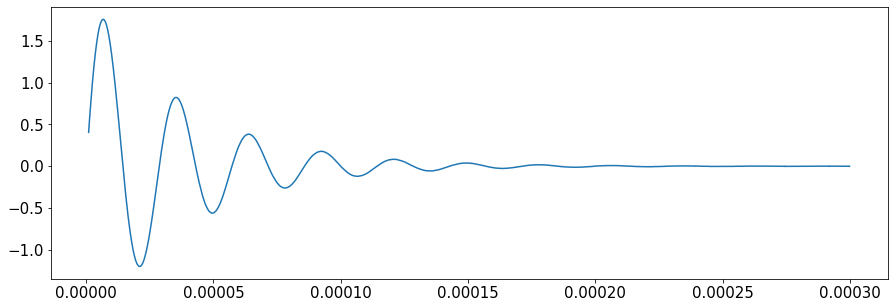

In [ ]:
def decaying_sin(x,A,alpha,omega,phi):
  y = A*np.exp(-alpha*x)*np.cos(np.sqrt(omega**2 - alpha**2)*x+phi)
  return y

# Convert Fit Function to Model
model = lm.Model(decaying_sin)  # turns the function into a model which can be used for fitting

# Add Parameters (intial values and constraints)
params = lm.Parameters()  # empty object to hold all fitting parameters
params.add(name='A', value=0.4, vary=True, min=-np.inf, max=np.inf)  # add param 'a' (allowed to vary, no min or max -- inf means infinity)
params.add('alpha', 24520)  # equivalent to above due to defaults
params.add('omega', 211500)
params.add('phi',1)

# Data Format Check
Vin = Vin.astype(np.float32)  # ensures data is np.float32 (NECESSARY)

#plt.plot(time,Vout)
left = np.argmin(abs(time-0.000001))
right = np.argmin(abs(time-0.0003))


plt.plot(time[left:right],Vin[left:right])


In [ ]:
# Fits and Returns lm.FitResult
fit = model.fit(Vin[left:right], x=time[left:right], params=params)  # y = data to fit; we're passing in corresponding x data and the fitting parameters
fit

In [ ]:

# Print Fit Values
print(fit.fit_report())

# Print Confidence Interval Report
print('\nConfidence Interval Report:')
ci = fit.conf_interval()


lm.printfuncs.report_ci(ci)

[[Model]]
    Model(decaying_sin)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 62
    # data points      = 2300
    # variables        = 4
    chi-square         = 0.02023522
    reduced chi-square = 8.8132e-06
    Akaike info crit   = -26766.2888
    Bayesian info crit = -26743.3261
[[Variables]]
    A:      2.12413707 +/- 5.2839e-04 (0.02%) (init = 0.4)
    alpha:  26771.9422 +/- 9.18555191 (0.03%) (init = 24520)
    omega:  221498.507 +/- 9.29871245 (0.00%) (init = 211500)
    phi:   -1.59279655 +/- 2.5485e-04 (0.02%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(omega, phi)   = -0.736
    C(A, alpha)     =  0.734
    C(A, omega)     =  0.254
    C(alpha, omega) =  0.238
    C(A, phi)       = -0.237
    C(alpha, phi)   = -0.170

Confidence Interval Report:
          99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 A    :  -0.00159  -0.00106  -0.00054   2.12414  +0.00054  +0.00106  +0.00159
 alpha: -27.55666

(<Figure size 1080x1080 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

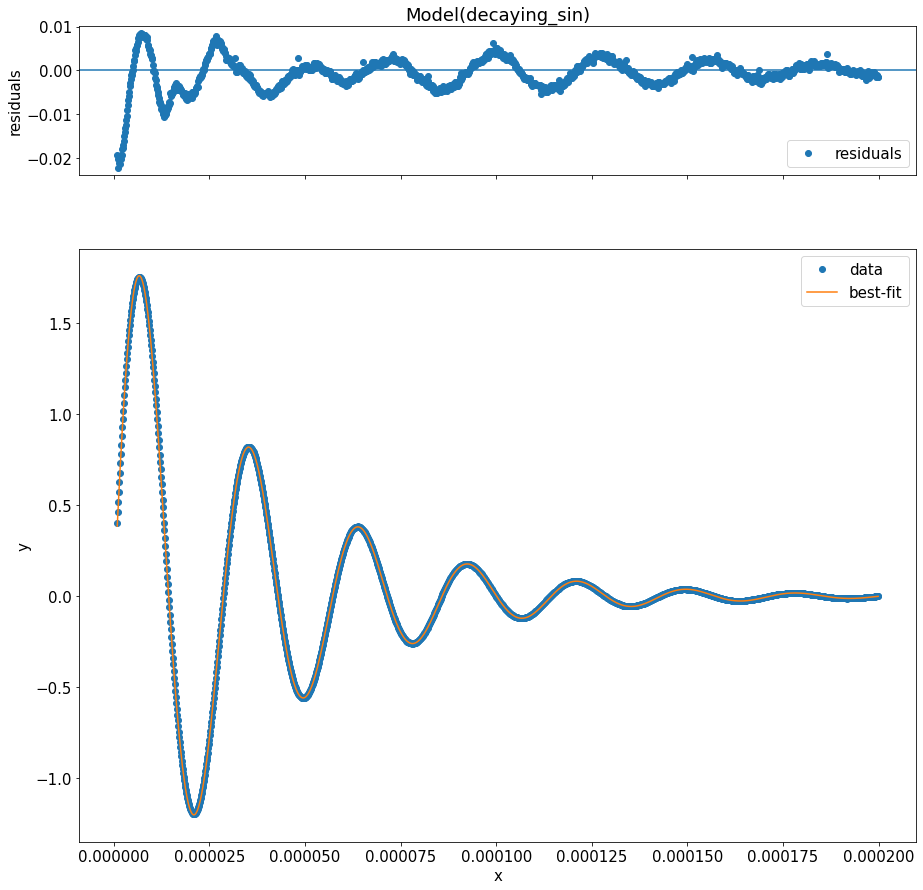

In [ ]:
fit.plot()

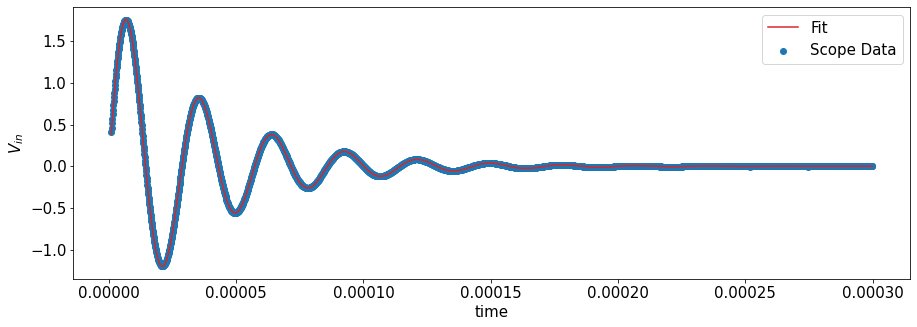

In [ ]:
# Create Figure
fig, ax = plt.subplots(1)

# Add Data
ax.scatter(time[left:right], Vin[left:right], label='Data')
ax.plot(time[left:right], fit.best_fit, label='best_fit', color='C3')
ax.set_xlabel('time')
ax.set_ylabel('$V_{in}$')
ax.legend(['Fit','Scope Data'])